<h1 align=center><font size = 5>AI SATURDAY LAGOS COHORT 8</font></h1>   

<h1 align=center><font size = 5>TEAM JOHNSON-SIRLEAF </font></h1>  
<h2 align=center><font size = 6>MACHINE LEARNING APPROACH TO
PREDICTING DIABETES RISKS</font></h2>

<h5 align=center><font size = 2>Data Source: <a href="https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset" target="_blank">Kaggle.<a/></font></h5>

## DATA PREPARATION

### Importing Libraries

In [55]:
import numpy as np                      # for mahematical operations
import pandas as pd                     # for data manipulation and cleaning
import seaborn as sns                   # for data visulization
import plotly.express as px             # for data visulization
import matplotlib.pyplot as plt         # for data visulization

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

### Loading Data

In [56]:
# Read in dataset
df = pd.read_csv('../data/diabetes_prediction_dataset.csv')

In [57]:
df.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0


### Data Dictionary

| variable       | class     | description                                                                  |
|:---------------|:----------|:-----------------------------------------------------------------------------|
| Gender               | character | Biological sex of the individual  |
| Age                  | numeric   | Age of the individual  |
| Hypertension         | numeric   | 0 = No Hypertension / 1 = Has Hypertension|
| Heart_disease        | numeric   | 0 = No Heart disease / 1 = Has Heart disease|
| Smoking_history      | character | 5 categories i.e not current,former,No Info,current,never and ever |
| bmi                  | numeric   | Body Mass Index, a measure of body fat based on weight and height|
| HbA1c_level          | numeric   | Hemoglobin A1c, a measure of a person's average blood sugar level over the past 2-3 months|
| Blood_glucose_level  | numeric | Amount of glucose in the bloodstream at a given time|
| Diabetes             | numeric | 0 indicates absence of diabetes, 1 indicates presence of Diabetes|

### Data Exploration

In [58]:
# check the data types of each features
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [59]:
# check the shape of the data
df.shape

(100000, 9)

In [60]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [62]:
# Checking statistics of the numeric features
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Data Wrangling

In [63]:
# save a copy of the data
df_copy = df.copy('Dataset/diabetes_prediction_dataset.csv')

In [64]:
def df_wrangle(df, dtype_convert, OneHot_cols):
    '''
    This function wrangles (cleans) our dataset by correcting datypes and One-Hot
    encoding dpecified columns
    
    Inputs
    df: (dataframe), dataframe to wrangle
    dtype_convert: (dictionary), pairs of column, dtype to convert to
    OneHot_col: (list), columns in the dataframe to One-Hot encode
    
    Output
    df: (dataframe), wrangled (cleaned) dataframe
    '''
    
    # convert datatypes to correct formats
    for col, dtype in dtype_convert.items():
        df[col] = df[col].astype(dtype)
        
    # One_Hot encode neccesary columns
    
    # Initialize the One-Hot Encoder
    encoder = LabelEncoder()
    
    # Label encode each column
    for col in OneHot_cols:
        df[col + '_encoded'] = encoder.fit_transform(df[col])

    # drop the initial columns
    df.drop(OneHot_cols, axis=1, inplace=True)
    
    # drop duplicate records
    df.drop_duplicates(inplace=True)
    
    return df

In [65]:
df = df_wrangle(df, {'age':'int'}, ['gender', 'smoking_history'])

In [66]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded
0,80,0,1,25.19,6.6,140,0,0,4
1,54,0,0,27.32,6.6,80,0,0,0
2,28,0,0,27.32,5.7,158,0,1,4
3,36,0,0,23.45,5.0,155,0,0,1
4,76,1,1,20.14,4.8,155,0,1,1


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96112 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      96112 non-null  int32  
 1   hypertension             96112 non-null  int64  
 2   heart_disease            96112 non-null  int64  
 3   bmi                      96112 non-null  float64
 4   HbA1c_level              96112 non-null  float64
 5   blood_glucose_level      96112 non-null  int64  
 6   diabetes                 96112 non-null  int64  
 7   gender_encoded           96112 non-null  int32  
 8   smoking_history_encoded  96112 non-null  int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 6.2 MB


In [68]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded
count,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000
mean,41.798287,0.077628,0.040817,27.321923,5.532618,138.221013,0.088251,0.416056,2.231948
std,22.472901,0.267587,0.197867,6.768534,1.073288,40.911287,0.283661,0.493285,1.879827
min,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000,0.000000,3.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000,1.000000,4.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000,2.000000,5.000000


#### Encoded Values

In [69]:
print("Gender")
for val in np.sort(df['gender_encoded'].unique()):
    print(f"{val} -> {df_copy.iloc[df[df['gender_encoded'] == val].index[0]]['gender']}")
    
print()

print("Smoking History")
for val in np.sort(df['smoking_history_encoded'].unique()):
    print(f"{val} -> {df_copy.iloc[df[df['smoking_history_encoded'] == val].index[0]]['smoking_history']}")

Gender
0 -> Female
1 -> Male
2 -> Other

Smoking History
0 -> No Info
1 -> current
2 -> ever
3 -> former
4 -> never
5 -> not current


### Defining Model Variables and Target

In [72]:
X = df.drop('diabetes', axis=1)
X.shape

(96112, 8)

In [73]:
y = df['diabetes']
y.shape

(96112,)

## Splitting, Tuning and Model Building

### Data Splitting

For our data splitting, the dataset contains 100,000 samples of data. The splitting would be done in the ratio 90:5:5, which implies 90000 data point for training, 5000 data points for dev set and 5000 data points for test set.

This is because 5% (5,000) samples is enough for each of our development and test sets.

> <b>NOTE</b>: Both dev set and test sets are referred to as validation dataset in our code.

##### Training Set and Validation Set

We will first split our data into 90% (90,000) for training, `X_train` and `y_train` while the reamining 10% (10,000) for validation, `X_val` and `y_val`

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
# 90,000 data points for training of dataset
X_train, X_val, y_train, y_val = train_test_split(X.values, y.values, test_size=0.1, random_state=123)

##### Validation Set - Dev and Test set
We are going to use about 10,000 data points for our validation test set. The `X_dev` and `y_dev` is the training dataset in the validation cycle, while the `X_test` and `y_test` are the test dataset in the validation cycle.

In [76]:
X_dev, X_test, y_dev, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=123)

In [77]:
print(f'Shape of X_train {X_train.shape}    Shape of y_train {y_train.shape}')
print(f'Shape of X_dev {X_dev.shape}       Shape of y_dev {y_dev.shape}')
print(f'Shape of X_test {X_test.shape}      Shape of y_test {y_test.shape}')

Shape of X_train (86500, 8)    Shape of y_train (86500,)
Shape of X_dev (4806, 8)       Shape of y_dev (4806,)
Shape of X_test (4806, 8)      Shape of y_test (4806,)


In [78]:
type(X_dev)

numpy.ndarray

### Hyperparameter Tuning

In [79]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

#### Choosing `n_estimators_list` Hyperparameter Value

In [80]:
n_estimators_list = [10,50,100,500,1000,2000]

In [81]:
acc_list_train = []
acc_list_val = []
f1_list_train = []
f1_list_val = []
for n_estimators in n_estimators_list:
    model = XGBClassifier(n_estimators = n_estimators, verbosity = 0,random_state = 123)
    model.fit(X_train,y_train, eval_set = [(X_dev,y_dev)]) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_dev)
    acc_train = accuracy_score(predictions_train,y_train)
    acc_val = accuracy_score(predictions_val,y_dev)
    f1_train = f1_score(predictions_train,y_train)
    f1_val = f1_score(predictions_val,y_dev)
    acc_list_train.append(acc_train)
    acc_list_val.append(acc_val)
    f1_list_train.append(f1_train)
    f1_list_val.append(f1_val)

[0]	validation_0-logloss:0.46328
[1]	validation_0-logloss:0.33677
[2]	validation_0-logloss:0.25821
[3]	validation_0-logloss:0.20633
[4]	validation_0-logloss:0.17093
[5]	validation_0-logloss:0.14609
[6]	validation_0-logloss:0.12881
[7]	validation_0-logloss:0.11652
[8]	validation_0-logloss:0.10761
[9]	validation_0-logloss:0.10098
[0]	validation_0-logloss:0.46328
[1]	validation_0-logloss:0.33677
[2]	validation_0-logloss:0.25821
[3]	validation_0-logloss:0.20633
[4]	validation_0-logloss:0.17093
[5]	validation_0-logloss:0.14609
[6]	validation_0-logloss:0.12881
[7]	validation_0-logloss:0.11652
[8]	validation_0-logloss:0.10761
[9]	validation_0-logloss:0.10098
[10]	validation_0-logloss:0.09547
[11]	validation_0-logloss:0.09189
[12]	validation_0-logloss:0.08927
[13]	validation_0-logloss:0.08707
[14]	validation_0-logloss:0.08560
[15]	validation_0-logloss:0.08408
[16]	validation_0-logloss:0.08321
[17]	validation_0-logloss:0.08234
[18]	validation_0-logloss:0.08184
[19]	validation_0-logloss:0.08142


[83]	validation_0-logloss:0.08169
[84]	validation_0-logloss:0.08184
[85]	validation_0-logloss:0.08185
[86]	validation_0-logloss:0.08191
[87]	validation_0-logloss:0.08191
[88]	validation_0-logloss:0.08195
[89]	validation_0-logloss:0.08194
[90]	validation_0-logloss:0.08196
[91]	validation_0-logloss:0.08182
[92]	validation_0-logloss:0.08186
[93]	validation_0-logloss:0.08184
[94]	validation_0-logloss:0.08182
[95]	validation_0-logloss:0.08186
[96]	validation_0-logloss:0.08190
[97]	validation_0-logloss:0.08186
[98]	validation_0-logloss:0.08185
[99]	validation_0-logloss:0.08189
[100]	validation_0-logloss:0.08190
[101]	validation_0-logloss:0.08196
[102]	validation_0-logloss:0.08194
[103]	validation_0-logloss:0.08195
[104]	validation_0-logloss:0.08213
[105]	validation_0-logloss:0.08216
[106]	validation_0-logloss:0.08225
[107]	validation_0-logloss:0.08235
[108]	validation_0-logloss:0.08258
[109]	validation_0-logloss:0.08260
[110]	validation_0-logloss:0.08263
[111]	validation_0-logloss:0.08270
[1

[53]	validation_0-logloss:0.08002
[54]	validation_0-logloss:0.07982
[55]	validation_0-logloss:0.08012
[56]	validation_0-logloss:0.08005
[57]	validation_0-logloss:0.08014
[58]	validation_0-logloss:0.08024
[59]	validation_0-logloss:0.08030
[60]	validation_0-logloss:0.08032
[61]	validation_0-logloss:0.08041
[62]	validation_0-logloss:0.08027
[63]	validation_0-logloss:0.08040
[64]	validation_0-logloss:0.08051
[65]	validation_0-logloss:0.08044
[66]	validation_0-logloss:0.08061
[67]	validation_0-logloss:0.08060
[68]	validation_0-logloss:0.08073
[69]	validation_0-logloss:0.08071
[70]	validation_0-logloss:0.08070
[71]	validation_0-logloss:0.08085
[72]	validation_0-logloss:0.08120
[73]	validation_0-logloss:0.08115
[74]	validation_0-logloss:0.08126
[75]	validation_0-logloss:0.08121
[76]	validation_0-logloss:0.08125
[77]	validation_0-logloss:0.08139
[78]	validation_0-logloss:0.08139
[79]	validation_0-logloss:0.08153
[80]	validation_0-logloss:0.08159
[81]	validation_0-logloss:0.08163
[82]	validatio

[289]	validation_0-logloss:0.08638
[290]	validation_0-logloss:0.08639
[291]	validation_0-logloss:0.08636
[292]	validation_0-logloss:0.08638
[293]	validation_0-logloss:0.08638
[294]	validation_0-logloss:0.08647
[295]	validation_0-logloss:0.08648
[296]	validation_0-logloss:0.08650
[297]	validation_0-logloss:0.08644
[298]	validation_0-logloss:0.08655
[299]	validation_0-logloss:0.08661
[300]	validation_0-logloss:0.08659
[301]	validation_0-logloss:0.08662
[302]	validation_0-logloss:0.08669
[303]	validation_0-logloss:0.08669
[304]	validation_0-logloss:0.08674
[305]	validation_0-logloss:0.08686
[306]	validation_0-logloss:0.08685
[307]	validation_0-logloss:0.08687
[308]	validation_0-logloss:0.08709
[309]	validation_0-logloss:0.08704
[310]	validation_0-logloss:0.08702
[311]	validation_0-logloss:0.08700
[312]	validation_0-logloss:0.08723
[313]	validation_0-logloss:0.08726
[314]	validation_0-logloss:0.08736
[315]	validation_0-logloss:0.08740
[316]	validation_0-logloss:0.08751
[317]	validation_0-l

[524]	validation_0-logloss:0.09477
[525]	validation_0-logloss:0.09481
[526]	validation_0-logloss:0.09484
[527]	validation_0-logloss:0.09488
[528]	validation_0-logloss:0.09488
[529]	validation_0-logloss:0.09484
[530]	validation_0-logloss:0.09489
[531]	validation_0-logloss:0.09478
[532]	validation_0-logloss:0.09487
[533]	validation_0-logloss:0.09488
[534]	validation_0-logloss:0.09488
[535]	validation_0-logloss:0.09490
[536]	validation_0-logloss:0.09490
[537]	validation_0-logloss:0.09517
[538]	validation_0-logloss:0.09543
[539]	validation_0-logloss:0.09546
[540]	validation_0-logloss:0.09545
[541]	validation_0-logloss:0.09548
[542]	validation_0-logloss:0.09549
[543]	validation_0-logloss:0.09565
[544]	validation_0-logloss:0.09568
[545]	validation_0-logloss:0.09572
[546]	validation_0-logloss:0.09573
[547]	validation_0-logloss:0.09574
[548]	validation_0-logloss:0.09582
[549]	validation_0-logloss:0.09588
[550]	validation_0-logloss:0.09589
[551]	validation_0-logloss:0.09593
[552]	validation_0-l

[759]	validation_0-logloss:0.09954
[760]	validation_0-logloss:0.09954
[761]	validation_0-logloss:0.09949
[762]	validation_0-logloss:0.09951
[763]	validation_0-logloss:0.09952
[764]	validation_0-logloss:0.09956
[765]	validation_0-logloss:0.09944
[766]	validation_0-logloss:0.09952
[767]	validation_0-logloss:0.09961
[768]	validation_0-logloss:0.09964
[769]	validation_0-logloss:0.09976
[770]	validation_0-logloss:0.09976
[771]	validation_0-logloss:0.09982
[772]	validation_0-logloss:0.09995
[773]	validation_0-logloss:0.09994
[774]	validation_0-logloss:0.09991
[775]	validation_0-logloss:0.09991
[776]	validation_0-logloss:0.09993
[777]	validation_0-logloss:0.09989
[778]	validation_0-logloss:0.09988
[779]	validation_0-logloss:0.09988
[780]	validation_0-logloss:0.09982
[781]	validation_0-logloss:0.09987
[782]	validation_0-logloss:0.09982
[783]	validation_0-logloss:0.09985
[784]	validation_0-logloss:0.09994
[785]	validation_0-logloss:0.09992
[786]	validation_0-logloss:0.09992
[787]	validation_0-l

[994]	validation_0-logloss:0.10647
[995]	validation_0-logloss:0.10647
[996]	validation_0-logloss:0.10648
[997]	validation_0-logloss:0.10660
[998]	validation_0-logloss:0.10663
[999]	validation_0-logloss:0.10665
[0]	validation_0-logloss:0.46328
[1]	validation_0-logloss:0.33677
[2]	validation_0-logloss:0.25821
[3]	validation_0-logloss:0.20633
[4]	validation_0-logloss:0.17093
[5]	validation_0-logloss:0.14609
[6]	validation_0-logloss:0.12881
[7]	validation_0-logloss:0.11652
[8]	validation_0-logloss:0.10761
[9]	validation_0-logloss:0.10098
[10]	validation_0-logloss:0.09547
[11]	validation_0-logloss:0.09189
[12]	validation_0-logloss:0.08927
[13]	validation_0-logloss:0.08707
[14]	validation_0-logloss:0.08560
[15]	validation_0-logloss:0.08408
[16]	validation_0-logloss:0.08321
[17]	validation_0-logloss:0.08234
[18]	validation_0-logloss:0.08184
[19]	validation_0-logloss:0.08142
[20]	validation_0-logloss:0.08123
[21]	validation_0-logloss:0.08096
[22]	validation_0-logloss:0.08042
[23]	validation_0-

[232]	validation_0-logloss:0.08437
[233]	validation_0-logloss:0.08452
[234]	validation_0-logloss:0.08454
[235]	validation_0-logloss:0.08473
[236]	validation_0-logloss:0.08483
[237]	validation_0-logloss:0.08473
[238]	validation_0-logloss:0.08473
[239]	validation_0-logloss:0.08471
[240]	validation_0-logloss:0.08474
[241]	validation_0-logloss:0.08477
[242]	validation_0-logloss:0.08478
[243]	validation_0-logloss:0.08479
[244]	validation_0-logloss:0.08482
[245]	validation_0-logloss:0.08500
[246]	validation_0-logloss:0.08498
[247]	validation_0-logloss:0.08509
[248]	validation_0-logloss:0.08509
[249]	validation_0-logloss:0.08531
[250]	validation_0-logloss:0.08559
[251]	validation_0-logloss:0.08560
[252]	validation_0-logloss:0.08559
[253]	validation_0-logloss:0.08564
[254]	validation_0-logloss:0.08564
[255]	validation_0-logloss:0.08564
[256]	validation_0-logloss:0.08572
[257]	validation_0-logloss:0.08576
[258]	validation_0-logloss:0.08584
[259]	validation_0-logloss:0.08589
[260]	validation_0-l

[467]	validation_0-logloss:0.09310
[468]	validation_0-logloss:0.09309
[469]	validation_0-logloss:0.09310
[470]	validation_0-logloss:0.09307
[471]	validation_0-logloss:0.09307
[472]	validation_0-logloss:0.09307
[473]	validation_0-logloss:0.09307
[474]	validation_0-logloss:0.09319
[475]	validation_0-logloss:0.09319
[476]	validation_0-logloss:0.09318
[477]	validation_0-logloss:0.09318
[478]	validation_0-logloss:0.09332
[479]	validation_0-logloss:0.09331
[480]	validation_0-logloss:0.09331
[481]	validation_0-logloss:0.09345
[482]	validation_0-logloss:0.09341
[483]	validation_0-logloss:0.09341
[484]	validation_0-logloss:0.09343
[485]	validation_0-logloss:0.09354
[486]	validation_0-logloss:0.09355
[487]	validation_0-logloss:0.09354
[488]	validation_0-logloss:0.09357
[489]	validation_0-logloss:0.09362
[490]	validation_0-logloss:0.09375
[491]	validation_0-logloss:0.09392
[492]	validation_0-logloss:0.09409
[493]	validation_0-logloss:0.09413
[494]	validation_0-logloss:0.09419
[495]	validation_0-l

[702]	validation_0-logloss:0.09924
[703]	validation_0-logloss:0.09925
[704]	validation_0-logloss:0.09920
[705]	validation_0-logloss:0.09920
[706]	validation_0-logloss:0.09921
[707]	validation_0-logloss:0.09924
[708]	validation_0-logloss:0.09921
[709]	validation_0-logloss:0.09922
[710]	validation_0-logloss:0.09927
[711]	validation_0-logloss:0.09931
[712]	validation_0-logloss:0.09938
[713]	validation_0-logloss:0.09940
[714]	validation_0-logloss:0.09933
[715]	validation_0-logloss:0.09933
[716]	validation_0-logloss:0.09927
[717]	validation_0-logloss:0.09926
[718]	validation_0-logloss:0.09936
[719]	validation_0-logloss:0.09931
[720]	validation_0-logloss:0.09935
[721]	validation_0-logloss:0.09936
[722]	validation_0-logloss:0.09933
[723]	validation_0-logloss:0.09936
[724]	validation_0-logloss:0.09936
[725]	validation_0-logloss:0.09935
[726]	validation_0-logloss:0.09937
[727]	validation_0-logloss:0.09943
[728]	validation_0-logloss:0.09942
[729]	validation_0-logloss:0.09943
[730]	validation_0-l

[937]	validation_0-logloss:0.10447
[938]	validation_0-logloss:0.10470
[939]	validation_0-logloss:0.10466
[940]	validation_0-logloss:0.10488
[941]	validation_0-logloss:0.10486
[942]	validation_0-logloss:0.10486
[943]	validation_0-logloss:0.10495
[944]	validation_0-logloss:0.10500
[945]	validation_0-logloss:0.10500
[946]	validation_0-logloss:0.10505
[947]	validation_0-logloss:0.10506
[948]	validation_0-logloss:0.10511
[949]	validation_0-logloss:0.10515
[950]	validation_0-logloss:0.10521
[951]	validation_0-logloss:0.10520
[952]	validation_0-logloss:0.10519
[953]	validation_0-logloss:0.10536
[954]	validation_0-logloss:0.10537
[955]	validation_0-logloss:0.10537
[956]	validation_0-logloss:0.10543
[957]	validation_0-logloss:0.10542
[958]	validation_0-logloss:0.10541
[959]	validation_0-logloss:0.10540
[960]	validation_0-logloss:0.10538
[961]	validation_0-logloss:0.10552
[962]	validation_0-logloss:0.10555
[963]	validation_0-logloss:0.10559
[964]	validation_0-logloss:0.10560
[965]	validation_0-l

[1394]	validation_0-logloss:0.11473
[1395]	validation_0-logloss:0.11473
[1396]	validation_0-logloss:0.11475
[1397]	validation_0-logloss:0.11478
[1398]	validation_0-logloss:0.11477
[1399]	validation_0-logloss:0.11479
[1400]	validation_0-logloss:0.11478
[1401]	validation_0-logloss:0.11475
[1402]	validation_0-logloss:0.11483
[1403]	validation_0-logloss:0.11478
[1404]	validation_0-logloss:0.11477
[1405]	validation_0-logloss:0.11476
[1406]	validation_0-logloss:0.11480
[1407]	validation_0-logloss:0.11481
[1408]	validation_0-logloss:0.11485
[1409]	validation_0-logloss:0.11484
[1410]	validation_0-logloss:0.11485
[1411]	validation_0-logloss:0.11486
[1412]	validation_0-logloss:0.11488
[1413]	validation_0-logloss:0.11491
[1414]	validation_0-logloss:0.11491
[1415]	validation_0-logloss:0.11493
[1416]	validation_0-logloss:0.11489
[1417]	validation_0-logloss:0.11487
[1418]	validation_0-logloss:0.11493
[1419]	validation_0-logloss:0.11495
[1420]	validation_0-logloss:0.11502
[1421]	validation_0-logloss:

[1622]	validation_0-logloss:0.11978
[1623]	validation_0-logloss:0.11976
[1624]	validation_0-logloss:0.11976
[1625]	validation_0-logloss:0.11978
[1626]	validation_0-logloss:0.11983
[1627]	validation_0-logloss:0.11991
[1628]	validation_0-logloss:0.11983
[1629]	validation_0-logloss:0.11986
[1630]	validation_0-logloss:0.11983
[1631]	validation_0-logloss:0.11989
[1632]	validation_0-logloss:0.11997
[1633]	validation_0-logloss:0.11994
[1634]	validation_0-logloss:0.11994
[1635]	validation_0-logloss:0.11995
[1636]	validation_0-logloss:0.11995
[1637]	validation_0-logloss:0.11995
[1638]	validation_0-logloss:0.11996
[1639]	validation_0-logloss:0.11998
[1640]	validation_0-logloss:0.12002
[1641]	validation_0-logloss:0.12000
[1642]	validation_0-logloss:0.12003
[1643]	validation_0-logloss:0.12001
[1644]	validation_0-logloss:0.12006
[1645]	validation_0-logloss:0.12008
[1646]	validation_0-logloss:0.12011
[1647]	validation_0-logloss:0.12013
[1648]	validation_0-logloss:0.12014
[1649]	validation_0-logloss:

[1850]	validation_0-logloss:0.12462
[1851]	validation_0-logloss:0.12461
[1852]	validation_0-logloss:0.12464
[1853]	validation_0-logloss:0.12463
[1854]	validation_0-logloss:0.12463
[1855]	validation_0-logloss:0.12467
[1856]	validation_0-logloss:0.12466
[1857]	validation_0-logloss:0.12465
[1858]	validation_0-logloss:0.12464
[1859]	validation_0-logloss:0.12468
[1860]	validation_0-logloss:0.12467
[1861]	validation_0-logloss:0.12469
[1862]	validation_0-logloss:0.12468
[1863]	validation_0-logloss:0.12470
[1864]	validation_0-logloss:0.12475
[1865]	validation_0-logloss:0.12477
[1866]	validation_0-logloss:0.12479
[1867]	validation_0-logloss:0.12481
[1868]	validation_0-logloss:0.12480
[1869]	validation_0-logloss:0.12480
[1870]	validation_0-logloss:0.12481
[1871]	validation_0-logloss:0.12484
[1872]	validation_0-logloss:0.12486
[1873]	validation_0-logloss:0.12488
[1874]	validation_0-logloss:0.12499
[1875]	validation_0-logloss:0.12500
[1876]	validation_0-logloss:0.12500
[1877]	validation_0-logloss:

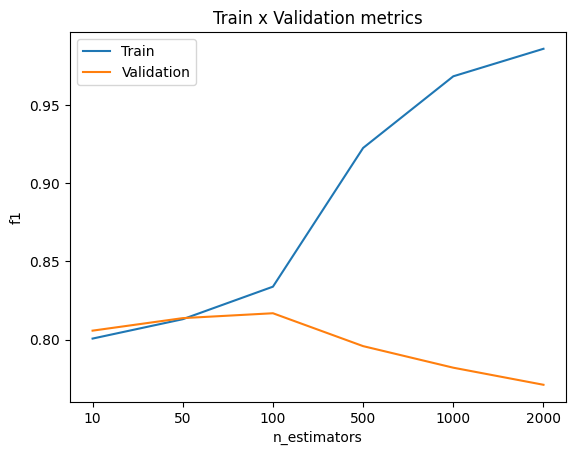

In [82]:
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('f1')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(f1_list_train)
plt.plot(f1_list_val)
plt.legend(['Train','Validation']);

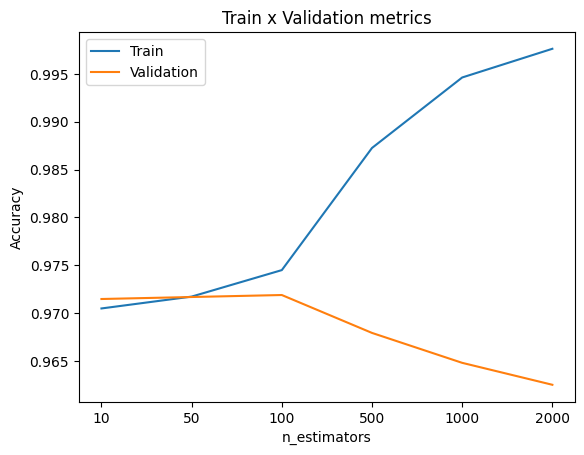

In [83]:
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(acc_list_train)
plt.plot(acc_list_val)
plt.legend(['Train','Validation']);

In [84]:
np.max(f1_list_val)

0.8168249660786974

In [85]:
np.max(acc_list_val)

0.9719101123595506

In [86]:
ind_n_estimators = np.argmax(f1_list_val)
ind_n_estimators

2

In [87]:
best_n_estimators = n_estimators_list[ind_n_estimators]
best_n_estimators

100

In [88]:
n_estimators_list = np.arange(50,160,10)

In [89]:
acc_list_train = []
acc_list_val = []
f1_list_train = []
f1_list_val = []
for n_estimators in n_estimators_list:
    model = XGBClassifier(n_estimators = n_estimators, verbosity = 0,random_state = 123)
    model.fit(X_train,y_train, eval_set = [(X_dev,y_dev)]) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_dev)
    acc_train = accuracy_score(predictions_train,y_train)
    acc_val = accuracy_score(predictions_val,y_dev)
    f1_train = f1_score(predictions_train,y_train)
    f1_val = f1_score(predictions_val,y_dev)
    acc_list_train.append(acc_train)
    acc_list_val.append(acc_val)
    f1_list_train.append(f1_train)
    f1_list_val.append(f1_val)

[0]	validation_0-logloss:0.46328
[1]	validation_0-logloss:0.33677
[2]	validation_0-logloss:0.25821
[3]	validation_0-logloss:0.20633
[4]	validation_0-logloss:0.17093
[5]	validation_0-logloss:0.14609
[6]	validation_0-logloss:0.12881
[7]	validation_0-logloss:0.11652
[8]	validation_0-logloss:0.10761
[9]	validation_0-logloss:0.10098
[10]	validation_0-logloss:0.09547
[11]	validation_0-logloss:0.09189
[12]	validation_0-logloss:0.08927
[13]	validation_0-logloss:0.08707
[14]	validation_0-logloss:0.08560
[15]	validation_0-logloss:0.08408
[16]	validation_0-logloss:0.08321
[17]	validation_0-logloss:0.08234
[18]	validation_0-logloss:0.08184
[19]	validation_0-logloss:0.08142
[20]	validation_0-logloss:0.08123
[21]	validation_0-logloss:0.08096
[22]	validation_0-logloss:0.08042
[23]	validation_0-logloss:0.08019
[24]	validation_0-logloss:0.08012
[25]	validation_0-logloss:0.07995
[26]	validation_0-logloss:0.07983
[27]	validation_0-logloss:0.07977
[28]	validation_0-logloss:0.07946
[29]	validation_0-loglos

[63]	validation_0-logloss:0.08040
[64]	validation_0-logloss:0.08051
[65]	validation_0-logloss:0.08044
[66]	validation_0-logloss:0.08061
[67]	validation_0-logloss:0.08060
[68]	validation_0-logloss:0.08073
[69]	validation_0-logloss:0.08071
[70]	validation_0-logloss:0.08070
[71]	validation_0-logloss:0.08085
[72]	validation_0-logloss:0.08120
[73]	validation_0-logloss:0.08115
[74]	validation_0-logloss:0.08126
[75]	validation_0-logloss:0.08121
[76]	validation_0-logloss:0.08125
[77]	validation_0-logloss:0.08139
[78]	validation_0-logloss:0.08139
[79]	validation_0-logloss:0.08153
[0]	validation_0-logloss:0.46328
[1]	validation_0-logloss:0.33677
[2]	validation_0-logloss:0.25821
[3]	validation_0-logloss:0.20633
[4]	validation_0-logloss:0.17093
[5]	validation_0-logloss:0.14609
[6]	validation_0-logloss:0.12881
[7]	validation_0-logloss:0.11652
[8]	validation_0-logloss:0.10761
[9]	validation_0-logloss:0.10098
[10]	validation_0-logloss:0.09547
[11]	validation_0-logloss:0.09189
[12]	validation_0-loglos

[35]	validation_0-logloss:0.07949
[36]	validation_0-logloss:0.07970
[37]	validation_0-logloss:0.07971
[38]	validation_0-logloss:0.07977
[39]	validation_0-logloss:0.07974
[40]	validation_0-logloss:0.07976
[41]	validation_0-logloss:0.07979
[42]	validation_0-logloss:0.07977
[43]	validation_0-logloss:0.07971
[44]	validation_0-logloss:0.07983
[45]	validation_0-logloss:0.07997
[46]	validation_0-logloss:0.08001
[47]	validation_0-logloss:0.08003
[48]	validation_0-logloss:0.08000
[49]	validation_0-logloss:0.08001
[50]	validation_0-logloss:0.07996
[51]	validation_0-logloss:0.08005
[52]	validation_0-logloss:0.07988
[53]	validation_0-logloss:0.08002
[54]	validation_0-logloss:0.07982
[55]	validation_0-logloss:0.08012
[56]	validation_0-logloss:0.08005
[57]	validation_0-logloss:0.08014
[58]	validation_0-logloss:0.08024
[59]	validation_0-logloss:0.08030
[60]	validation_0-logloss:0.08032
[61]	validation_0-logloss:0.08041
[62]	validation_0-logloss:0.08027
[63]	validation_0-logloss:0.08040
[64]	validatio

[46]	validation_0-logloss:0.08001
[47]	validation_0-logloss:0.08003
[48]	validation_0-logloss:0.08000
[49]	validation_0-logloss:0.08001
[50]	validation_0-logloss:0.07996
[51]	validation_0-logloss:0.08005
[52]	validation_0-logloss:0.07988
[53]	validation_0-logloss:0.08002
[54]	validation_0-logloss:0.07982
[55]	validation_0-logloss:0.08012
[56]	validation_0-logloss:0.08005
[57]	validation_0-logloss:0.08014
[58]	validation_0-logloss:0.08024
[59]	validation_0-logloss:0.08030
[60]	validation_0-logloss:0.08032
[61]	validation_0-logloss:0.08041
[62]	validation_0-logloss:0.08027
[63]	validation_0-logloss:0.08040
[64]	validation_0-logloss:0.08051
[65]	validation_0-logloss:0.08044
[66]	validation_0-logloss:0.08061
[67]	validation_0-logloss:0.08060
[68]	validation_0-logloss:0.08073
[69]	validation_0-logloss:0.08071
[70]	validation_0-logloss:0.08070
[71]	validation_0-logloss:0.08085
[72]	validation_0-logloss:0.08120
[73]	validation_0-logloss:0.08115
[74]	validation_0-logloss:0.08126
[75]	validatio

[16]	validation_0-logloss:0.08321
[17]	validation_0-logloss:0.08234
[18]	validation_0-logloss:0.08184
[19]	validation_0-logloss:0.08142
[20]	validation_0-logloss:0.08123
[21]	validation_0-logloss:0.08096
[22]	validation_0-logloss:0.08042
[23]	validation_0-logloss:0.08019
[24]	validation_0-logloss:0.08012
[25]	validation_0-logloss:0.07995
[26]	validation_0-logloss:0.07983
[27]	validation_0-logloss:0.07977
[28]	validation_0-logloss:0.07946
[29]	validation_0-logloss:0.07966
[30]	validation_0-logloss:0.07961
[31]	validation_0-logloss:0.07956
[32]	validation_0-logloss:0.07958
[33]	validation_0-logloss:0.07958
[34]	validation_0-logloss:0.07954
[35]	validation_0-logloss:0.07949
[36]	validation_0-logloss:0.07970
[37]	validation_0-logloss:0.07971
[38]	validation_0-logloss:0.07977
[39]	validation_0-logloss:0.07974
[40]	validation_0-logloss:0.07976
[41]	validation_0-logloss:0.07979
[42]	validation_0-logloss:0.07977
[43]	validation_0-logloss:0.07971
[44]	validation_0-logloss:0.07983
[45]	validatio

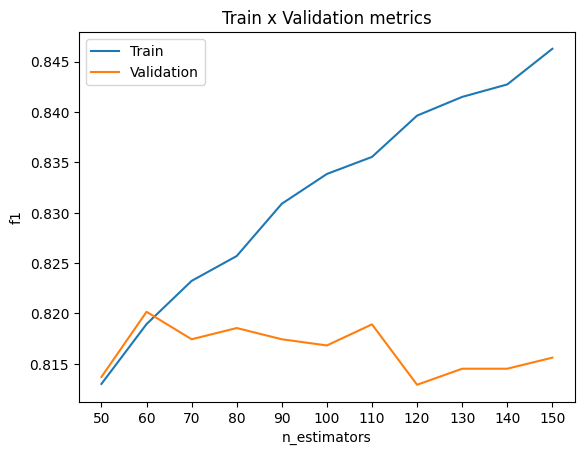

In [90]:
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('f1')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(f1_list_train)
plt.plot(f1_list_val)
plt.legend(['Train','Validation']);

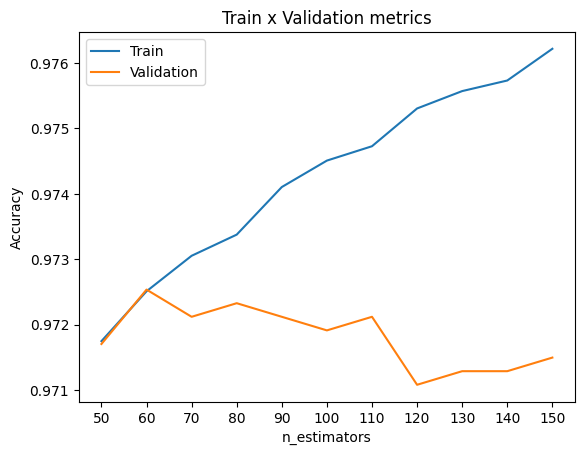

In [91]:
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(acc_list_train)
plt.plot(acc_list_val)
plt.legend(['Train','Validation']);

In [92]:
np.max(f1_list_val)

0.8201634877384196

In [93]:
np.max(acc_list_val)

0.9725343320848939

In [94]:
ind_n_estimators = np.argmax(f1_list_val)
ind_n_estimators

1

In [95]:
best_n_estimators = n_estimators_list[ind_n_estimators]
best_n_estimators

60

In [96]:
n_estimators_list = np.arange(50,71)

In [97]:
acc_list_train = []
acc_list_val = []
f1_list_train = []
f1_list_val = []
for n_estimators in n_estimators_list:
    model = XGBClassifier(n_estimators = n_estimators, verbosity = 0,random_state = 123)
    model.fit(X_train,y_train, eval_set = [(X_dev,y_dev)]) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_dev)
    acc_train = accuracy_score(predictions_train,y_train)
    acc_val = accuracy_score(predictions_val,y_dev)
    f1_train = f1_score(predictions_train,y_train)
    f1_val = f1_score(predictions_val,y_dev)
    acc_list_train.append(acc_train)
    acc_list_val.append(acc_val)
    f1_list_train.append(f1_train)
    f1_list_val.append(f1_val)

[0]	validation_0-logloss:0.46328
[1]	validation_0-logloss:0.33677
[2]	validation_0-logloss:0.25821
[3]	validation_0-logloss:0.20633
[4]	validation_0-logloss:0.17093
[5]	validation_0-logloss:0.14609
[6]	validation_0-logloss:0.12881
[7]	validation_0-logloss:0.11652
[8]	validation_0-logloss:0.10761
[9]	validation_0-logloss:0.10098
[10]	validation_0-logloss:0.09547
[11]	validation_0-logloss:0.09189
[12]	validation_0-logloss:0.08927
[13]	validation_0-logloss:0.08707
[14]	validation_0-logloss:0.08560
[15]	validation_0-logloss:0.08408
[16]	validation_0-logloss:0.08321
[17]	validation_0-logloss:0.08234
[18]	validation_0-logloss:0.08184
[19]	validation_0-logloss:0.08142
[20]	validation_0-logloss:0.08123
[21]	validation_0-logloss:0.08096
[22]	validation_0-logloss:0.08042
[23]	validation_0-logloss:0.08019
[24]	validation_0-logloss:0.08012
[25]	validation_0-logloss:0.07995
[26]	validation_0-logloss:0.07983
[27]	validation_0-logloss:0.07977
[28]	validation_0-logloss:0.07946
[29]	validation_0-loglos

[37]	validation_0-logloss:0.07971
[38]	validation_0-logloss:0.07977
[39]	validation_0-logloss:0.07974
[40]	validation_0-logloss:0.07976
[41]	validation_0-logloss:0.07979
[42]	validation_0-logloss:0.07977
[43]	validation_0-logloss:0.07971
[44]	validation_0-logloss:0.07983
[45]	validation_0-logloss:0.07997
[46]	validation_0-logloss:0.08001
[47]	validation_0-logloss:0.08003
[48]	validation_0-logloss:0.08000
[49]	validation_0-logloss:0.08001
[50]	validation_0-logloss:0.07996
[51]	validation_0-logloss:0.08005
[52]	validation_0-logloss:0.07988
[53]	validation_0-logloss:0.08002
[0]	validation_0-logloss:0.46328
[1]	validation_0-logloss:0.33677
[2]	validation_0-logloss:0.25821
[3]	validation_0-logloss:0.20633
[4]	validation_0-logloss:0.17093
[5]	validation_0-logloss:0.14609
[6]	validation_0-logloss:0.12881
[7]	validation_0-logloss:0.11652
[8]	validation_0-logloss:0.10761
[9]	validation_0-logloss:0.10098
[10]	validation_0-logloss:0.09547
[11]	validation_0-logloss:0.09189
[12]	validation_0-loglos

[0]	validation_0-logloss:0.46328
[1]	validation_0-logloss:0.33677
[2]	validation_0-logloss:0.25821
[3]	validation_0-logloss:0.20633
[4]	validation_0-logloss:0.17093
[5]	validation_0-logloss:0.14609
[6]	validation_0-logloss:0.12881
[7]	validation_0-logloss:0.11652
[8]	validation_0-logloss:0.10761
[9]	validation_0-logloss:0.10098
[10]	validation_0-logloss:0.09547
[11]	validation_0-logloss:0.09189
[12]	validation_0-logloss:0.08927
[13]	validation_0-logloss:0.08707
[14]	validation_0-logloss:0.08560
[15]	validation_0-logloss:0.08408
[16]	validation_0-logloss:0.08321
[17]	validation_0-logloss:0.08234
[18]	validation_0-logloss:0.08184
[19]	validation_0-logloss:0.08142
[20]	validation_0-logloss:0.08123
[21]	validation_0-logloss:0.08096
[22]	validation_0-logloss:0.08042
[23]	validation_0-logloss:0.08019
[24]	validation_0-logloss:0.08012
[25]	validation_0-logloss:0.07995
[26]	validation_0-logloss:0.07983
[27]	validation_0-logloss:0.07977
[28]	validation_0-logloss:0.07946
[29]	validation_0-loglos

[1]	validation_0-logloss:0.33677
[2]	validation_0-logloss:0.25821
[3]	validation_0-logloss:0.20633
[4]	validation_0-logloss:0.17093
[5]	validation_0-logloss:0.14609
[6]	validation_0-logloss:0.12881
[7]	validation_0-logloss:0.11652
[8]	validation_0-logloss:0.10761
[9]	validation_0-logloss:0.10098
[10]	validation_0-logloss:0.09547
[11]	validation_0-logloss:0.09189
[12]	validation_0-logloss:0.08927
[13]	validation_0-logloss:0.08707
[14]	validation_0-logloss:0.08560
[15]	validation_0-logloss:0.08408
[16]	validation_0-logloss:0.08321
[17]	validation_0-logloss:0.08234
[18]	validation_0-logloss:0.08184
[19]	validation_0-logloss:0.08142
[20]	validation_0-logloss:0.08123
[21]	validation_0-logloss:0.08096
[22]	validation_0-logloss:0.08042
[23]	validation_0-logloss:0.08019
[24]	validation_0-logloss:0.08012
[25]	validation_0-logloss:0.07995
[26]	validation_0-logloss:0.07983
[27]	validation_0-logloss:0.07977
[28]	validation_0-logloss:0.07946
[29]	validation_0-logloss:0.07966
[30]	validation_0-loglo

[52]	validation_0-logloss:0.07988
[53]	validation_0-logloss:0.08002
[54]	validation_0-logloss:0.07982
[55]	validation_0-logloss:0.08012
[56]	validation_0-logloss:0.08005
[57]	validation_0-logloss:0.08014
[58]	validation_0-logloss:0.08024
[59]	validation_0-logloss:0.08030
[60]	validation_0-logloss:0.08032
[61]	validation_0-logloss:0.08041
[62]	validation_0-logloss:0.08027
[63]	validation_0-logloss:0.08040
[64]	validation_0-logloss:0.08051
[65]	validation_0-logloss:0.08044
[0]	validation_0-logloss:0.46328
[1]	validation_0-logloss:0.33677
[2]	validation_0-logloss:0.25821
[3]	validation_0-logloss:0.20633
[4]	validation_0-logloss:0.17093
[5]	validation_0-logloss:0.14609
[6]	validation_0-logloss:0.12881
[7]	validation_0-logloss:0.11652
[8]	validation_0-logloss:0.10761
[9]	validation_0-logloss:0.10098
[10]	validation_0-logloss:0.09547
[11]	validation_0-logloss:0.09189
[12]	validation_0-logloss:0.08927
[13]	validation_0-logloss:0.08707
[14]	validation_0-logloss:0.08560
[15]	validation_0-loglos

[25]	validation_0-logloss:0.07995
[26]	validation_0-logloss:0.07983
[27]	validation_0-logloss:0.07977
[28]	validation_0-logloss:0.07946
[29]	validation_0-logloss:0.07966
[30]	validation_0-logloss:0.07961
[31]	validation_0-logloss:0.07956
[32]	validation_0-logloss:0.07958
[33]	validation_0-logloss:0.07958
[34]	validation_0-logloss:0.07954
[35]	validation_0-logloss:0.07949
[36]	validation_0-logloss:0.07970
[37]	validation_0-logloss:0.07971
[38]	validation_0-logloss:0.07977
[39]	validation_0-logloss:0.07974
[40]	validation_0-logloss:0.07976
[41]	validation_0-logloss:0.07979
[42]	validation_0-logloss:0.07977
[43]	validation_0-logloss:0.07971
[44]	validation_0-logloss:0.07983
[45]	validation_0-logloss:0.07997
[46]	validation_0-logloss:0.08001
[47]	validation_0-logloss:0.08003
[48]	validation_0-logloss:0.08000
[49]	validation_0-logloss:0.08001
[50]	validation_0-logloss:0.07996
[51]	validation_0-logloss:0.08005
[52]	validation_0-logloss:0.07988
[53]	validation_0-logloss:0.08002
[54]	validatio

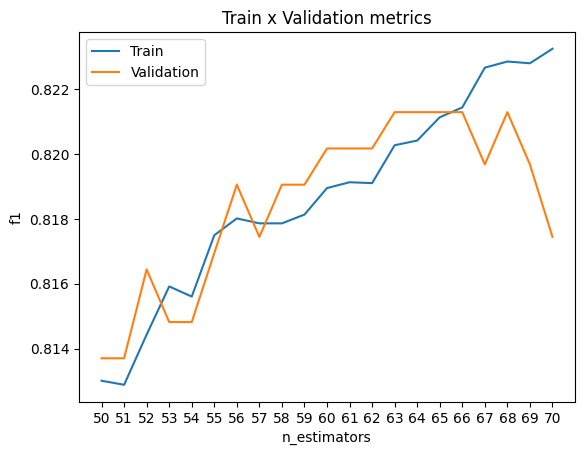

In [98]:
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('f1')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(f1_list_train)
plt.plot(f1_list_val)
plt.legend(['Train','Validation']);

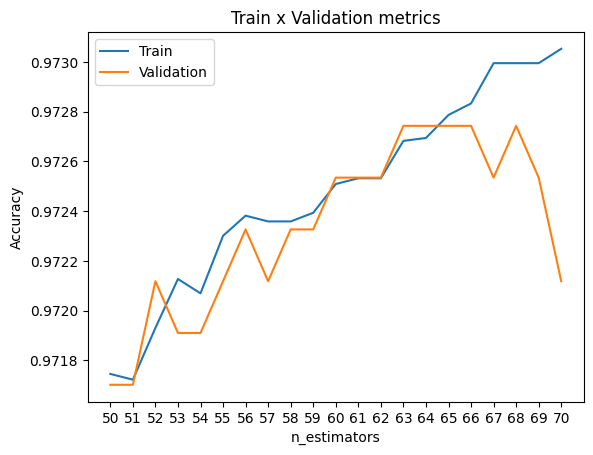

In [99]:
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(acc_list_train)
plt.plot(acc_list_val)
plt.legend(['Train','Validation']);

In [100]:
np.max(f1_list_val)

0.8212824010914052

In [101]:
np.max(acc_list_val)

0.972742405326675

In [102]:
ind_n_estimators = np.argmax(f1_list_val)
ind_n_estimators

13

In [114]:
best_n_estimators = n_estimators_list[ind_n_estimators]
best_n_estimators

63

> The model performed best when the parameter is 63. We are going with 63 for `n_estimators`

### Cross Validation

We have a total of 96,112 datasets, we would carry out cross validation to make sure we immerse the 80% of our dataset into model training and 20% into test. For this we would use a kfold of 5.

In [104]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=123)

In [113]:
print(f'Shape of X_train_val {X_train_val.shape}    Shape of y_train_val {y_train_val.shape}')
print(f'Shape of X_test      {X_test.shape}    Shape of y_test      {y_test.shape}')

Shape of X_train_val (76889, 8)    Shape of y_train_val (76889,)
Shape of X_test      (19223, 8)    Shape of y_test      (19223,)


#### Cross Validation using F1 score as evaluation metrics

In [105]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

In [106]:
model = XGBClassifier(n_estimators = best_n_estimators, verbosity = 0,random_state = 123)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scorer = make_scorer(f1_score, average="binary")
cross_val_result_arr = cross_val_score(model, X_train_val, y_train_val, cv=kf, scoring=f1_scorer)

In [107]:
# Printing the results
print("Cross-Validation Results:", cross_val_result_arr)
print(f"Mean F1 score: {cross_val_result_arr.mean():.4f}")
print(f"Standard deviation of F1 score: {cross_val_result_arr.std():.4f}")

Cross-Validation Results: [0.82288599 0.79552303 0.79415557 0.81122449 0.80547242]
Mean F1 score: 0.8059
Standard deviation of F1 score: 0.0106


### Model Building

In [108]:
## Using on test dataset
model = XGBClassifier(n_estimators = best_n_estimators, verbosity = 0,random_state = 123)

model.fit(X_train_val, y_train_val)

y_pred = model.predict(X_test)

f1_test_score = f1_score(y_test, y_pred, average='binary')

print(f"F1 Score on Test Set: {f1_test_score:.4f}")

F1 Score on Test Set: 0.8047


### Confusion Matrix

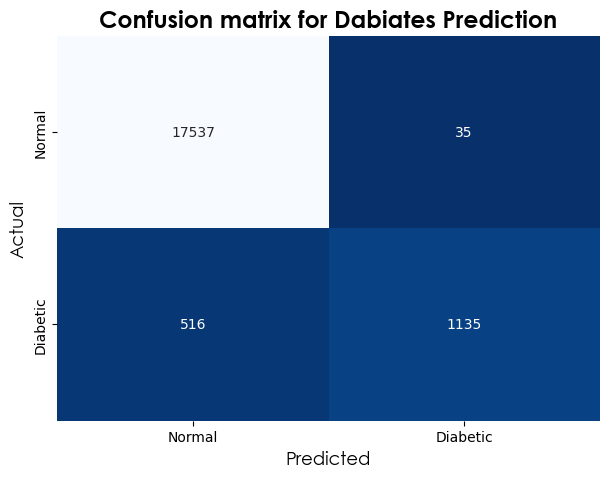

In [109]:
color  = ['#3355FF','#00FF00','#0D004D','#00bfff','#ffcc99','#006600']
# sns.countplot(x='Purchased', data = insurance, palette = color[2:4]);


def ConfusionMatrix(ytest, ypred, label: [str, str] = ["Negative", "Positive"]):
    "A beautiful confusion matrix function to check the model performance"
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'Blues_r')
    plt.xlabel('Predicted',font = 'Century Gothic', fontsize = 13)
    plt.ylabel('Actual', font = 'Century Gothic', fontsize = 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.title('Confusion matrix for Dabiates Prediction', font = "Century Gothic", fontsize = 17,fontweight = 'bold');


ConfusionMatrix(y_test, y_pred, label = ["Normal", "Diabetic"])

### Interpretation of the Logistic Regression Model Evaluation Performance
Out of the `19,223` patient data used for the test dataset:

There are `17537` True Negatives (TN): predicting that patients are  not diabetic and truly the patients are not diabetic.

There `516` False Negatives (FN): predicting that the patients are not diabetic meanwhile the patients are diabetic.

There are `1135` True Positives (TP): predicting that the patients are diabetic and they actually diabetic.

There are also `35` False Positives (FP): predicting that the patients are diabetic meanwhile they are actually not diabetic.

Based on the confusion matrix, we can see that although performed very well in predicting the positive and negative cases, it can still be better.